<a href="https://colab.research.google.com/github/rpatel71/Design-Optimization/blob/main/homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the answer of the homework-3 of Design Optimization.

Problem 1:

(1) Formulation of the Least square problem:

$ \min\limits _{A_{12}, A_{21}} \sum\limits _{i=1} ^{n} (P(x_{i}, A_{12}, A_{21}) - P_{exp})^2 $

Here, $P_{exp}$ is experimental data of the pressure.

$P(x_{i}, A_{12}, A_{21})$ is a function given. also, $ x_{1} + x_{2} = 1$.

for the $2^{nd}$ part of the problem 1 please refer to the code given below.

In [58]:
# importing all the libraries required
import numpy as np
import torch as tor
from torch.autograd import Variable
import matplotlib.pyplot as plt

# defining all the parameters
X1 = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
X2 = np.flip(X1, axis = 1).copy()
a = np.array(([[8.0731, 1730.63, 233.426], [7.43155, 1554.679, 240.337]]))
# T = 20
p_w = 10 ** (a[0, 0] - a[0, 1] / (20 + a[0, 2]))
p_diox = 10 ** (a[1, 0] - a[1, 1] / (20 + a[1, 2]))
P_num = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
P = tor.tensor(P_num, requires_grad=False, dtype=tor.float32)
A = Variable(tor.tensor([2.0, 2.0]), requires_grad=True)
x1 = tor.tensor(X1, requires_grad=False, dtype=tor.float32)
x2 = tor.tensor(X2, requires_grad=False, dtype=tor.float32)

# Step-size
a = 0.001
for i in range(100):
    P_cal = x1 * tor.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2)) ** 2) * p_w + \
            x2 * tor.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2)) ** 2) * p_diox
    
    # Least Square error
    loss = (P_cal - P) ** 2
    loss = loss.sum()
    loss.backward()
    with tor.no_grad():
        A -= a * A.grad
        A.grad.zero_()
print(loss)
print('The predicted values of A12 and A21 is: ', A, 'respecitvely')
print('final loss is: ', loss.data.numpy())

# calculation of P when the values of A12 and A21 are found after optimization.
P_opt = x1 * tor.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2)) ** 2) * p_w + \
        x2 * tor.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2)) ** 2) * p_diox
print(P_opt)

# making a temporary variable P1 to detach the P_opt of the gradient and conversion of tensor to numpy array.
P1 = P_opt.detach().numpy()

# converting 2D arrays into 1D arrays to plot the graph
P_cal = []
x_given = []
P_exp = []
for i in range(0,11):
  P_exp.append(P_num[0,i])
  x_given.append(X1[0,i])
  P_cal.append(P1[0, i])

print(P_cal)
print(x_given)

tensor(0.6709, grad_fn=<SumBackward0>)
The predicted values of A12 and A21 is:  tensor([1.9531, 1.6834], requires_grad=True) respecitvely
final loss is:  0.670936
tensor([[28.8241, 34.6405, 36.4540, 36.8727, 36.8804, 36.7535, 36.3885, 35.3770,
         32.9398, 27.7401, 17.5454]], grad_fn=<AddBackward0>)
[28.824099, 34.640488, 36.45405, 36.87272, 36.880394, 36.753456, 36.38845, 35.376965, 32.939754, 27.740105, 17.54542]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


Text(0.5, 1.0, 'Comparison of optimized model with given data')

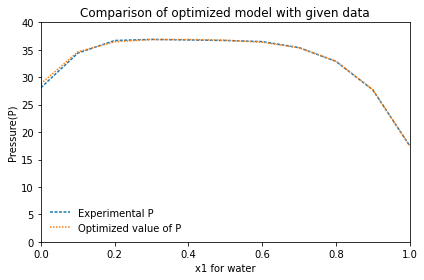

In [59]:
# Ploting the graph of Experimental data and Optimized data of pressure.
fig, ax = plt.subplots(1, 1, tight_layout=1)
ax.plot(x_given, P_exp, c='C0', dashes=(2,1), label='Experimental P')
ax.plot(x_given, P_cal, c='C1', dashes=(1,1), label='Optimized value of P')
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 40.0)
ax.set_xlabel('x1 for water')
ax.set_ylabel('Pressure(P)')
ax.legend(frameon=0)
plt.title('Comparison of optimized model with given data')

(3) comparing optimized model with Experimental data, we can see from the graph that model data fits really well with the experimental data. 

Problem 2

In [49]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=ca9427a3bd65eb6b1e42a6c0805fe6a23f03605bb333bbb473543997b0e34ae8
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [52]:
from bayes_opt import BayesianOptimization
def eq(x1, x2):
  var = -((4 - (2.1*x1**2) + ((x1**4)/3))*x1**2 + (x1*x2) + (-4 + 4*(x2**2)) * x2**2)
  # we are taking the var as "negative" because this library only have maximize function.
  var_flip = -var
  return var
lim = {'x1': (-3, 3), 'x2': (-2, 2)}

opt = BayesianOptimization(f=eq, pbounds=lim, random_state=1)

# To minimize the function required, we need to use maximize function since we have already taken the function as negative.
opt.maximize(init_points = 10, n_iter = 101)
print(opt.max)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -26.91    | -2.119    | -1.631    |
|  4        | -2.856    | -1.882    | -0.6178   |
|  5        | -1.054    | -0.6194   |  0.1553   |
|  6        |  0.5211   | -0.4848   |  0.7409   |
|  7        | -11.28    | -1.773    |  1.512    |
|  8        | -66.76    | -2.836    |  0.6819   |
|  9        | -0.5377   | -0.4962   |  0.2348   |
|  10       | -12.02    | -2.158    | -1.208    |
|  11       | -6.707    | -0.6913   | -1.287    |
|  12       | -4.507    |  1.223    |  1.081    |
|  13       | -0.5198   |  1.354    | -0.6292   |
|  14       | -65.32    |  2.812    |  0.1161   |
|  15       | -48.23    |  1.016    | -2.0      |
|  16       | -49.11    |  0.3388   |  2.0      |
|  17       | -1.532    |  0.7023   |  0.103    |
|  18       | -68.92    |  2.385    |  2.0      |


In [53]:
# Here we are multiplying the target value with (-1) since we found the value of negative of the objective function
target = -1*opt.max['target']
min = opt.max['params']
print(f'The function reaches value of {target} at the minimum point {min}')

The function reaches value of -1.0315238171217054 at the minimum point {'x1': 0.08488968290376103, 'x2': -0.7134409049862657}
